# Lecture 8: Gradient Methods

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from gd import rewrite_as_quadratic_form

# Inline plotting
%matplotlib inline

# Make sympy print pretty math expressions
sy.init_printing()


<img src="figures/lecture-08/figure-8.1.png" width="600" />


Function of two decision variables $x_1$ and $x_2$. 


<img src="figures/lecture-08/method-of-steepest-descent.png" width="600" />



<img src="figures/lecture-08/proposition-8.1.png" width="600" />



<img src="figures/lecture-08/figure-8.2.png" width="600" />



<img src="figures/lecture-08/proposition-8.2.png" width="600" />



<img src="figures/lecture-08/stopping-criteria.png" width="600" />


The condition $\triangledown f(x^{(k)}) $, however, is not directly suitable as a practical stopping criterion, because the numerical computation of the gradient will rarely be identically equal to zero. There are several practical stopping criteria:

- Stop if the norm $\lVert \triangledown f(x^{(k)}) \rVert$ of the gradient is less than a prespecified threshold
- Stop if the absolute difference between objective function values for every two successive iterations is less than some prespecified threshold $\epsilon$:
$$
\left| f(x^{(k+1)}) - f(x^{(k)}) \right|  < \epsilon \hspace{10mm}
$$ 
- Stop if the norm of the difference between two successive iterate is less than a prespecified threshold (if the x's does not change):
$$
\left \lVert x^{(k+1)} - x^{(k)} \right \rVert  < \epsilon \hspace{10mm}
$$
- Relative criterion 1 (take the max to avoid division by zero):
$$
\frac{\left| f(x^{(k+1)}) - f(x^{(k)}) \right|}{ \max \left\{ 1, \left| f(x^{(k)}) \right| \right\} }
< 
\epsilon \hspace{10mm}
$$ 
- Relative criterion 2:
$$
\frac{\left\lVert x^{(k+1)} - x^{(k)} \right\rVert}{ \max \left\{ 1, \left\lVert x^{(k)} \right\rVert \right\} }
< 
\epsilon \hspace{10mm}
$$ 

The two (relative) stopping criteria above are preferable to the previous (absolute) criteria because the relative criteria are "scale-independent".

---
## Example 8.1



<img src="figures/lecture-08/example-8.1a.png" width="600" />



<img src="figures/lecture-08/example-8.1b.png" width="600" />



<img src="figures/lecture-08/figure-8.3.png" width="400" />



<img src="figures/lecture-08/example-8.1c.png" width="600" />


---
## Quadratic Forms

<img src="figures/lecture-08/quadratic-form.png" width="600" />


<img src="figures/lecture-08/quadratic-form-symmetric-q.png" width="600" />


<img src="figures/lecture-08/definite-matrix.png" width="600" />


So, how can we check the **definiteness** of a quadratic form or equivalently, a symmetric matrix $\mathbf{Q}$? 

We can check the eigenvalues of $\mathbf{Q}$ as stated in **Theorem 3.7**:

<img src="figures/lecture-08/definiteness-symmetric-matrix.png" width="600" />


---
## Eigenvalues and Eigenvectors

<img src="figures/lecture-08/characteristic-polynomial.png" width="600" />


<img src="figures/lecture-08/theorem-3.1.png" width="600" />


<img src="figures/lecture-08/symmetric-matrix.png" width="600" />


<img src="figures/lecture-08/theorem-3.3.png" width="600" />


<img src="figures/lecture-08/orthogonal-matrices.png" width="600" />


---
## Steepest Descent and Quadratic Functions


<img src="figures/lecture-08/steepest-descent-quadratic-function.png" width="600" />


where $\mathbf{Q}$ and $\mathbf{b}$ are given.

The steepest descent algorithm for the quadratic function can be represented as
\begin{align}
\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} - \alpha_k  \mathbf{g}^{k}
\end{align}
where $\mathbf{g}^{k} = \nabla f \left( \mathbf{x}^{k}  \right) = \mathbf{Qx}-\mathbf{b}$ and

<img src="figures/lecture-08/alpha-quadratic.png" width="500" />


We can derive the steepest descent algorithm for quadratic functions:


<img src="figures/lecture-08/solution-steepest-descent-for-quadratic-functions.png" width="600" />


Notice that we have found an expression for $\alpha_k$ in the algorithm, which is:
$$
\alpha_k = \frac{ \mathbf{g}^{(k)T} \mathbf{g} }{ \mathbf{g}^{(k)T} \mathbf{Q} \mathbf{g}^{(k)} } \mathbf{g}^{(k)} 
$$

--- 
## Convergence of Gradient Methods

Lemma 8.1 and Theorem 8.1 are used to prove Theorem 8.2 which is more important to know.


<img src="figures/lecture-08/lemma-8.1.png" width="600" />



<img src="figures/lecture-08/theorem-8.1.png" width="600" />



<img src="figures/lecture-08/theorem-8.2.png" width="600" />


This tells us that if we have a quadratic function, then the steepest descent algorithm will always converge  to the minimum no matter where we start from. This is an important result because other algorithms like the Newton method, the starting point is very important. We have to start close to the minimum in order to get good results.

---
## Fixed step-size Gradient Algorithm

Computing $\alpha_k$ at each iteration $k$ can be expensive. Sometimes, it may be useful to relax this  condition and use a fixed $\alpha$. 


<img src="figures/lecture-08/fixed-step-size-gradient-algorithm.png" width="600" />



<img src="figures/lecture-08/fixed-step-size-gradient-algorithm-text.png" width="600" />


Now, the question is whether this simpler algorithm with fixed $\alpha$ will converge no matter where we start. It turns out that it does if $\alpha$ is chosen to be between within a certain range. 


<img src="figures/lecture-08/theorem-8.3.png" width="600" />



Theorem 8.3 tells us that the largest range of values of $\alpha$ for which the gradient algorithm is globally convergent is beween zero and $\frac{2}{\lambda_{max}(\mathbf{Q})}$. This means for $\alpha$ to converge, we need the value of alpha to be within the range given in Theorem 8.3.

---
## Example 8.4


<img src="figures/lecture-08/example-8.4.png" width="600" />


This example shows that the matrix $Q$ is not symmetric but we can make it symmetric.

The `rewrite_as_quadratic_form` cannot handle $2 \sqrt{2}$ so we have to convert that to a float.

In [2]:
x1, x2 = sy.symbols('x1, x2')
x = sy.Matrix([[x1],
               [x2]])
A = sy.Matrix([[4, 2*np.sqrt(2)],
               [0, 5]])
b = sy.Matrix([[3],
               [6]])
f = x.T * A * x + x.T * b 
f

In [3]:
f_expanded = sy.expand(f[0])
f_expanded

In [4]:
Q, b = rewrite_as_quadratic_form(f_expanded, x1, x2)

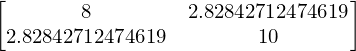

In [5]:
Q

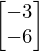

In [6]:
b

--- 
## Convergence Rate of Gradient Methods

We now turn our attention to the issue of convergence rates of gradient algorithms. In particular, we focus on the steepest descent algorithm. We first present the following theorem.


<img src="figures/lecture-08/theorem-8.4.png" width="600" />



<img src="figures/lecture-08/condition-number-q.png" width="600" />


The condition number $r$ is computed using the 2-norm. The Gamma in the MatLAB example is the condition number. If this number is small then we converge quicker. If Gamma is large then the convergance is very slow. The condition number tells us the behaviour the gradient descent algorith.  


<img src="figures/lecture-08/convergence-ratio.png" width="600" />



<img src="figures/lecture-08/figure-8.6.png" width="600" />
